In [1]:
# Import necessary packages/functions
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
#Reads in accounts receivable_file into df
df_AR = pd.read_csv('accounts_receivable.csv')

df_AR.columns

Index(['FISCPER', 'SOLD_TO', 'AC_DOC_NO', 'ITEM_NUM', 'CREATED_ON',
       'PAYMENT_METHOD', 'PAYMENT_TERMS', 'PAYMENT_BLOCK', 'CREDIT_LC',
       'DAYS_ALLOWED', 'LOB', 'DEFAULTED'],
      dtype='object')

In [4]:
#Reads in customer_data file into df
df_CD = pd.read_csv('customer_data.csv')

df_CD.columns

Index(['SOLD_TO', 'GROUP_KEY', 'CUST_CLASS', 'INDUSTRY', 'CREDITGRP', 'MARKET',
       'SUB_MARKET', 'REC_CR_LM', 'RISK_CAT', 'REP_GROUP', 'CUST_GROUP',
       'CUST_CREATEDON', 'NAICS', 'AVG_D2P'],
      dtype='object')

In [5]:
#Reads in customer_sales_history file into df
df_CS = pd.read_csv('customer_sales_history.csv')

df_CS.columns

Index(['GROUP_KEY', 'FISCPER', 'sumTOTAL_CUST_SALES', 'avgTOTAL_CUST_SALES'], dtype='object')

In [11]:
#merge three files
merge1 = pd.merge(df_AR,df_CD, on="SOLD_TO")
df = pd.merge(merge1, df_CS, on = "GROUP_KEY")

df.columns

Index(['FISCPER_x', 'SOLD_TO', 'AC_DOC_NO', 'ITEM_NUM', 'CREATED_ON',
       'PAYMENT_METHOD', 'PAYMENT_TERMS', 'PAYMENT_BLOCK', 'CREDIT_LC',
       'DAYS_ALLOWED', 'LOB', 'DEFAULTED', 'GROUP_KEY', 'CUST_CLASS',
       'INDUSTRY', 'CREDITGRP', 'MARKET', 'SUB_MARKET', 'REC_CR_LM',
       'RISK_CAT', 'REP_GROUP', 'CUST_GROUP', 'CUST_CREATEDON', 'NAICS',
       'AVG_D2P', 'FISCPER_y', 'sumTOTAL_CUST_SALES', 'avgTOTAL_CUST_SALES'],
      dtype='object')

In [20]:
df.head()

,FISCPER_x,SOLD_TO,AC_DOC_NO,ITEM_NUM,CREATED_ON,PAYMENT_METHOD,PAYMENT_TERMS,PAYMENT_BLOCK,CREDIT_LC,DAYS_ALLOWED,...,REC_CR_LM,RISK_CAT,REP_GROUP,CUST_GROUP,CUST_CREATEDON,NAICS,AVG_D2P,FISCPER_y,sumTOTAL_CUST_SALES,avgTOTAL_CUST_SALES
0,2009002,0a7dcbdb79686097c792db4d118c25785cbf5c4b567b20...,939609351,1,20090210,NaN,Z810,NaN,0.0,30,...,35612.0,MED,A17,NCS,20030327.0,443142.0,28.432073,2009002,4388.73,4388.73
1,2009002,0a7dcbdb79686097c792db4d118c25785cbf5c4b567b20...,939609351,1,20090210,NaN,Z810,NaN,0.0,30,...,35612.0,MED,A17,NCS,20030327.0,443142.0,28.432073,2017002,1369.36,1369.36
2,2009002,0a7dcbdb79686097c792db4d118c25785cbf5c4b567b20...,939609351,1,20090210,NaN,Z810,NaN,0.0,30,...,35612.0,MED,A17,NCS,20030327.0,443142.0,28.432073,2019002,19749.33,19749.33
3,2009002,0a7dcbdb79686097c792db4d118c25785cbf5c4b567b20...,939609351,1,20090210,NaN,Z810,NaN,0.0,30,...,35612.0,MED,A17,NCS,20030327.0,443142.0,28.432073,2017009,15412.52,15412.52
4,2009002,0a7dcbdb79686097c792db4d118c25785cbf5c4b567b20...,939609351,1,20090210,NaN,Z810,NaN,0.0,30,...,35612.0,MED,A17,NCS,20030327.0,443142.0,28.432073,2009009,746.22,746.22


In [ ]:
#df.rename(columns={"A": "a", "B": "c"}

# Data cleaning

In [27]:
# data cleaning
# import packages
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib

# The "ggplot" style replicates a popular plotting style 
# from R (another open source coding language)
plt.style.use('ggplot')
from matplotlib.pyplot import figure

# Set figure sizes as a parameter
# "rc" = runtime configuration
matplotlib.rcParams['figure.figsize'] = (12,8)

In [21]:
# what are the dimensions? Use ".shape"
print(df.shape)

(1776203, 28)


In [22]:
# What are the data types?
print(df.dtypes)

FISCPER_x                int64
SOLD_TO                 object
AC_DOC_NO                int64
ITEM_NUM                 int64
CREATED_ON               int64
PAYMENT_METHOD          object
PAYMENT_TERMS           object
PAYMENT_BLOCK           object
CREDIT_LC              float64
DAYS_ALLOWED             int64
LOB                    float64
DEFAULTED                int64
GROUP_KEY               object
CUST_CLASS             float64
INDUSTRY                object
CREDITGRP               object
MARKET                  object
SUB_MARKET             float64
REC_CR_LM              float64
RISK_CAT                object
REP_GROUP               object
CUST_GROUP              object
CUST_CREATEDON         float64
NAICS                  float64
AVG_D2P                float64
FISCPER_y                int64
sumTOTAL_CUST_SALES    float64
avgTOTAL_CUST_SALES    float64
dtype: object


In [23]:
# What data is numeric?
# define a new data frame to include only numeric variables
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['FISCPER_x' 'AC_DOC_NO' 'ITEM_NUM' 'CREATED_ON' 'CREDIT_LC'
 'DAYS_ALLOWED' 'LOB' 'DEFAULTED' 'CUST_CLASS' 'SUB_MARKET' 'REC_CR_LM'
 'CUST_CREATEDON' 'NAICS' 'AVG_D2P' 'FISCPER_y' 'sumTOTAL_CUST_SALES'
 'avgTOTAL_CUST_SALES']


In [24]:
# What data is non-numeric?
# create a data frame of non-numeric data
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['SOLD_TO' 'PAYMENT_METHOD' 'PAYMENT_TERMS' 'PAYMENT_BLOCK' 'GROUP_KEY'
 'INDUSTRY' 'CREDITGRP' 'MARKET' 'RISK_CAT' 'REP_GROUP' 'CUST_GROUP']


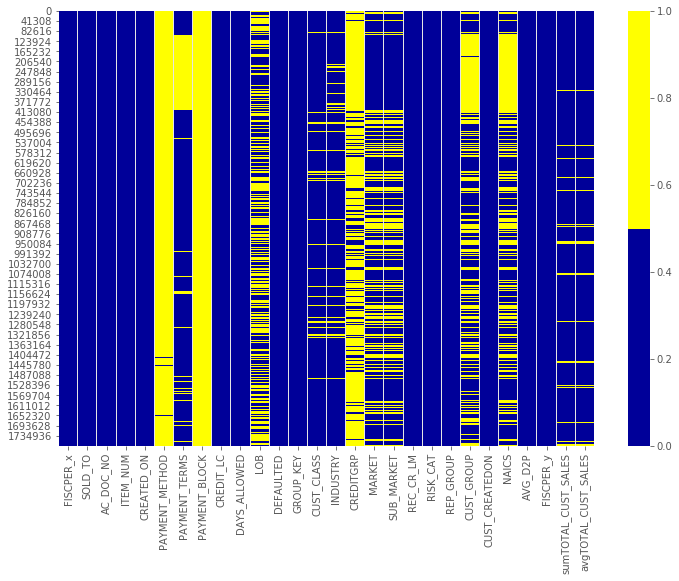

In [28]:
# Visualizations work better with a smaller number of features
# We will use the first 30 columns, [:30]
cols = df.columns[:30]

#Specify colors: yellow will be missing. blue will be not missing
colors = ['#000099', '#ffff00']

# Call the heatmap function from seaborn package
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))


In [29]:
# Percent of missing
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

FISCPER_x - 0.0%
SOLD_TO - 0.0%
AC_DOC_NO - 0.0%
ITEM_NUM - 0.0%
CREATED_ON - 0.0%
PAYMENT_METHOD - 99.0%
PAYMENT_TERMS - 21.0%
PAYMENT_BLOCK - 100.0%
CREDIT_LC - 0.0%
DAYS_ALLOWED - 0.0%
LOB - 47.0%
DEFAULTED - 0.0%
GROUP_KEY - 0.0%
CUST_CLASS - 6.0%
INDUSTRY - 8.0%
CREDITGRP - 80.0%
MARKET - 29.0%
SUB_MARKET - 29.0%
REC_CR_LM - 0.0%
RISK_CAT - 0.0%
REP_GROUP - 0.0%
CUST_GROUP - 47.0%
CUST_CREATEDON - 0.0%
NAICS - 47.0%
AVG_D2P - 0.0%
FISCPER_y - 0.0%
sumTOTAL_CUST_SALES - 4.0%
avgTOTAL_CUST_SALES - 4.0%


created missing indicator for: PAYMENT_METHOD
created missing indicator for: PAYMENT_TERMS
created missing indicator for: PAYMENT_BLOCK
created missing indicator for: LOB
created missing indicator for: GROUP_KEY
created missing indicator for: CUST_CLASS
created missing indicator for: INDUSTRY
created missing indicator for: CREDITGRP
created missing indicator for: MARKET
created missing indicator for: SUB_MARKET
created missing indicator for: REC_CR_LM
created missing indicator for: RISK_CAT
created missing indicator for: REP_GROUP
created missing indicator for: CUST_GROUP
created missing indicator for: CUST_CREATEDON
created missing indicator for: NAICS
created missing indicator for: sumTOTAL_CUST_SALES
created missing indicator for: avgTOTAL_CUST_SALES


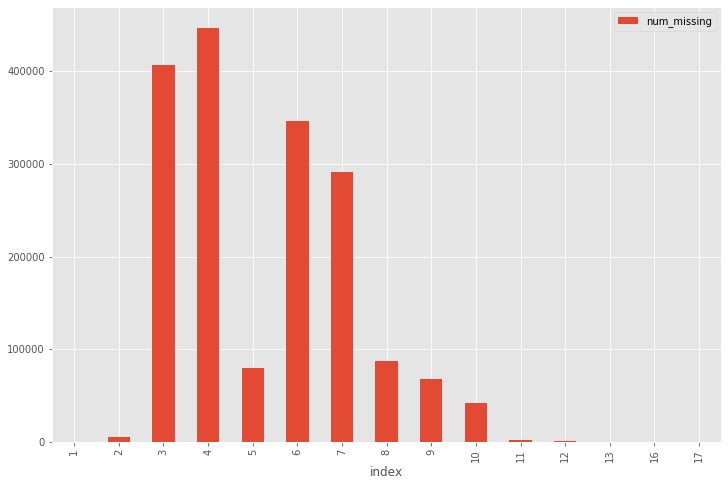

In [30]:
# Create missing data histogram

# First create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing

# Based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols ].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [31]:
# drop rows with a log of missing values
ind_missing = df[df['num_missing']>35].index
df_less_missing_rows = df.drop(ind_missing,axis=0)

In [37]:
df_less_missing_rows.head()

,FISCPER_x,SOLD_TO,AC_DOC_NO,ITEM_NUM,CREATED_ON,PAYMENT_METHOD,PAYMENT_TERMS,PAYMENT_BLOCK,CREDIT_LC,DAYS_ALLOWED,...,SUB_MARKET_ismissing,REC_CR_LM_ismissing,RISK_CAT_ismissing,REP_GROUP_ismissing,CUST_GROUP_ismissing,CUST_CREATEDON_ismissing,NAICS_ismissing,sumTOTAL_CUST_SALES_ismissing,avgTOTAL_CUST_SALES_ismissing,num_missing
0,2009002,0a7dcbdb79686097c792db4d118c25785cbf5c4b567b20...,939609351,1,20090210,NaN,Z810,NaN,0.0,30,...,False,False,False,False,False,False,False,False,False,3
1,2009002,0a7dcbdb79686097c792db4d118c25785cbf5c4b567b20...,939609351,1,20090210,NaN,Z810,NaN,0.0,30,...,False,False,False,False,False,False,False,False,False,3
2,2009002,0a7dcbdb79686097c792db4d118c25785cbf5c4b567b20...,939609351,1,20090210,NaN,Z810,NaN,0.0,30,...,False,False,False,False,False,False,False,False,False,3
3,2009002,0a7dcbdb79686097c792db4d118c25785cbf5c4b567b20...,939609351,1,20090210,NaN,Z810,NaN,0.0,30,...,False,False,False,False,False,False,False,False,False,3
4,2009002,0a7dcbdb79686097c792db4d118c25785cbf5c4b567b20...,939609351,1,20090210,NaN,Z810,NaN,0.0,30,...,False,False,False,False,False,False,False,False,False,3


In [39]:
# Drop Missing value over 40%
#PAYMENT_METHOD - 99.0%
#PAYMENT_BLOCK - 100.0%
#LOB - 47.0%
#CREDITGRP - 80.0%
#CUST_GROUP - 47.0%
#NAICS - 47.0%

# To drop this variable...
cols_to_drop = ['PAYMENT_METHOD','PAYMENT_BLOCK','LOB','CREDITGRP','CUST_GROUP','NAICS']
df_drop_missing = df.drop(cols_to_drop, axis=1)

In [42]:
df_drop_missing.columns

Index(['FISCPER_x', 'SOLD_TO', 'AC_DOC_NO', 'ITEM_NUM', 'CREATED_ON',
       'PAYMENT_TERMS', 'CREDIT_LC', 'DAYS_ALLOWED', 'DEFAULTED', 'GROUP_KEY',
       'CUST_CLASS', 'INDUSTRY', 'MARKET', 'SUB_MARKET', 'REC_CR_LM',
       'RISK_CAT', 'REP_GROUP', 'CUST_CREATEDON', 'AVG_D2P', 'FISCPER_y',
       'sumTOTAL_CUST_SALES', 'avgTOTAL_CUST_SALES',
       'PAYMENT_METHOD_ismissing', 'PAYMENT_TERMS_ismissing',
       'PAYMENT_BLOCK_ismissing', 'LOB_ismissing', 'GROUP_KEY_ismissing',
       'CUST_CLASS_ismissing', 'INDUSTRY_ismissing', 'CREDITGRP_ismissing',
       'MARKET_ismissing', 'SUB_MARKET_ismissing', 'REC_CR_LM_ismissing',
       'RISK_CAT_ismissing', 'REP_GROUP_ismissing', 'CUST_GROUP_ismissing',
       'CUST_CREATEDON_ismissing', 'NAICS_ismissing',
       'sumTOTAL_CUST_SALES_ismissing', 'avgTOTAL_CUST_SALES_ismissing',
       'num_missing'],
      dtype='object')